# TP1 Organización de Datos

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Leemos el archivo

In [3]:
train = pd.read_csv('train.csv')
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Análisis general

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [7]:
train['location'].value_counts()

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
midwest                            1
Saint Lucia                        1
Sheff/Bangor/Salamanca/Madrid      1
Oshawa, Canada                     1
Sherwood, Brisbane, Australia      1
Name: location, Length: 3341, dtype: int64

In [8]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [10]:
ordenado_t = train.sort_values('text')
ordenado_t
i = 650
while i < 700 :
    print (i)
    print (ordenado_t['text'].iloc[i])
    i += 1

650
1) 'Investigators say a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot unlocked a braking system early'
651
1-6 TIX Calgary Flames vs COL Avalanche Preseason 9/29 Scotiabank Saddledome http://t.co/5G8qA6mPxm
652
1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
653
1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr
654
1.9 #Earthquake in 5Km S Of Volcano Hawaii #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
655
1.9 earthquake occurred 15km E of Anchorage Alaska at 00:11 UTC! #earthquake #Anchorage http://t.co/QFyy5aZIFx
656
1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1
657
1/2 of the deaths in red-light running crashes are pedestrians bicyclists &amp; other vehicle occupants that are hit by the red-light ru

In [11]:
ordenado_t.iloc[666]

id                                                       5127
keyword                                                 fatal
location                                             Varanasi
text        11-Year-Old Boy Charged With Manslaughter of T...
target                                                      1
Name: 3589, dtype: object

In [12]:
top_keyword = ordenado_t[ordenado_t['keyword'] == 'fatal']
top_keyword.head(12)

,id,keyword,location,text,target
3609,5152,fatal,NaN,#news #crimes Police ID victim in fatal crash ...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


In [13]:
train['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [14]:
top_keyword = train[train['keyword'] == 'fatalities']
top_keyword

,id,keyword,location,text,target
3616,5162,fatalities,NaN,EXCLUSIVE: In 179 fatalities involving on-duty...,1
3617,5164,fatalities,New York,#NYC #News Legionnaires death toll rises to 8 ...,1
3618,5165,fatalities,"New York City ,NY",Let's fraction the vital need for Our fataliti...,0
3619,5166,fatalities,NaN,Las Vegas in top 5 cities for red-light runnin...,0
3620,5168,fatalities,"Corpus Christi, Texas",We are totally unprepared for an EMP attack. B...,1
3621,5169,fatalities,Cape Town,City implores motorists not to speed after mor...,1
3622,5170,fatalities,NaN,@kyrikoni @ExpressandStar Who said veg and fru...,0
3623,5171,fatalities,Wolverhampton/Brum/Jersey,Understand that there are no fatalities as no ...,1
3624,5172,fatalities,"Chamblee, Georgia",As of the 6-month mark there were a total of 6...,1
3625,5174,fatalities,Official Website,#HSE releases annual workplace facilities data...,0


## Correlaciones

### Buscamos alguna relación entre el largo de los Tweets y con su veracidad

In [15]:
pos_col_text = train.columns.get_loc('text')+1
train.insert(loc=pos_col_text, column='len_text', value=train['text'].iloc[:].str.len())
train.head(5)

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1


In [16]:
train['len_text'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: len_text, dtype: float64

In [17]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Plot

Text(0, 0.5, 'Cantidad')

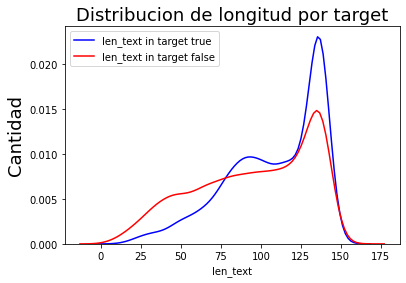

In [18]:
g1 = sb.distplot(train[train['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(train[train['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

In [19]:
top_keyword['target'].value_counts()

1    26
0    19
Name: target, dtype: int64

In [20]:
top_keyword['location'].value_counts()

Corpus Christi, Texas             1
Wisconsin                         1
Just Happy to Be Anywhere         1
Lima, Ohio                        1
The North                         1
TechFish                          1
Ireland                           1
Washington, DC                    1
Caserta-Roma, Italy               1
WestEnd, Puritan Ave              1
United States where it's warm     1
Washington, DC & Charlotte, NC    1
New York City ,NY                 1
Chamblee, Georgia                 1
oman muscat al seeb               1
Official Website                  1
#WashingtonState #Seattle         1
Cape Town                         1
Nantes, France                    1
Hope Road, Jamaica                1
Avon, OH                          1
San Francisco                     1
Vancouver BC                      1
St. John's, NL, Canada            1
Philadelphia, PA                  1
jersey                            1
Wolverhampton/Brum/Jersey         1
Youngstown, OH              

### Buscamos relacion entre la zona y la veracidad

In [21]:
true = train[train['target'] == 1]
true

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,1


In [32]:
true['keyword'].value_counts()

outbreak       39
wreckage       39
derailment     39
debris         37
oil%20spill    37
               ..
body%20bag      1
ruin            1
blazing         1
body%20bags     1
electrocute     1
Name: keyword, Length: 220, dtype: int64

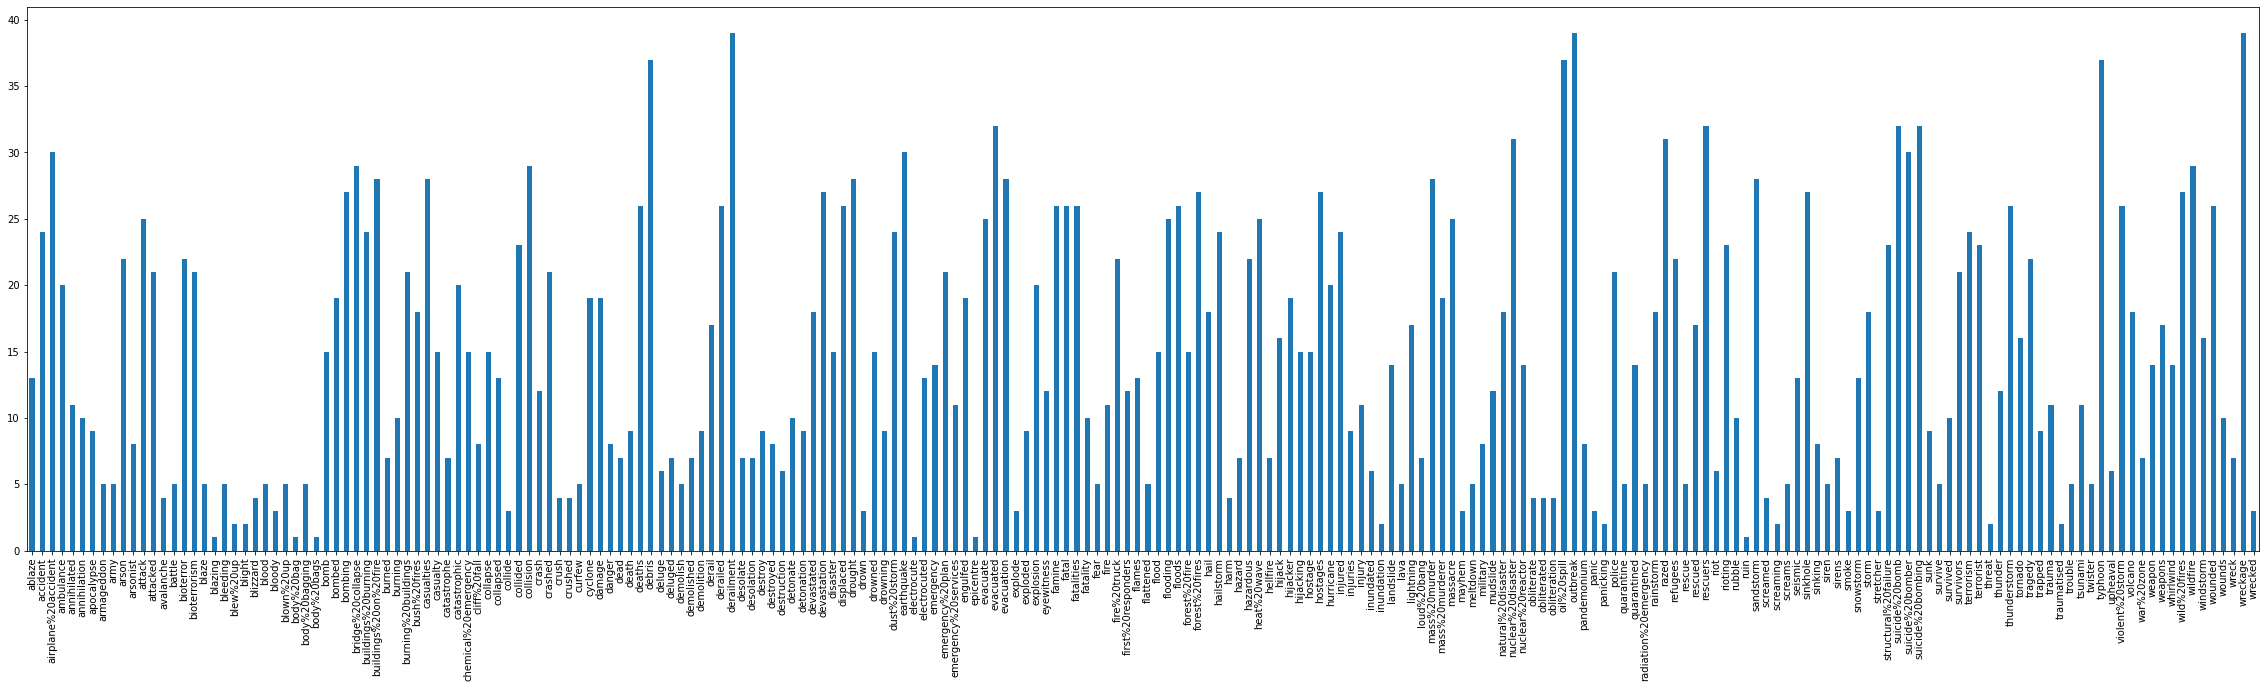

In [22]:
true['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))

In [23]:
false = train[train['target'] == 0]
false

,id,keyword,location,text,len_text,target
15,23,NaN,NaN,What's up man?,14,0
16,24,NaN,NaN,I love fruits,13,0
17,25,NaN,NaN,Summer is lovely,16,0
18,26,NaN,NaN,My car is so fast,17,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,28,0
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,104,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,80,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,127,0
7587,10841,NaN,NaN,Sirens everywhere!,18,0


In [33]:
false['keyword'].value_counts()

body%20bags          40
harm                 37
armageddon           37
ruin                 36
deluge               36
                     ..
oil%20spill           1
suicide%20bomber      1
suicide%20bombing     1
outbreak              1
typhoon               1
Name: keyword, Length: 218, dtype: int64

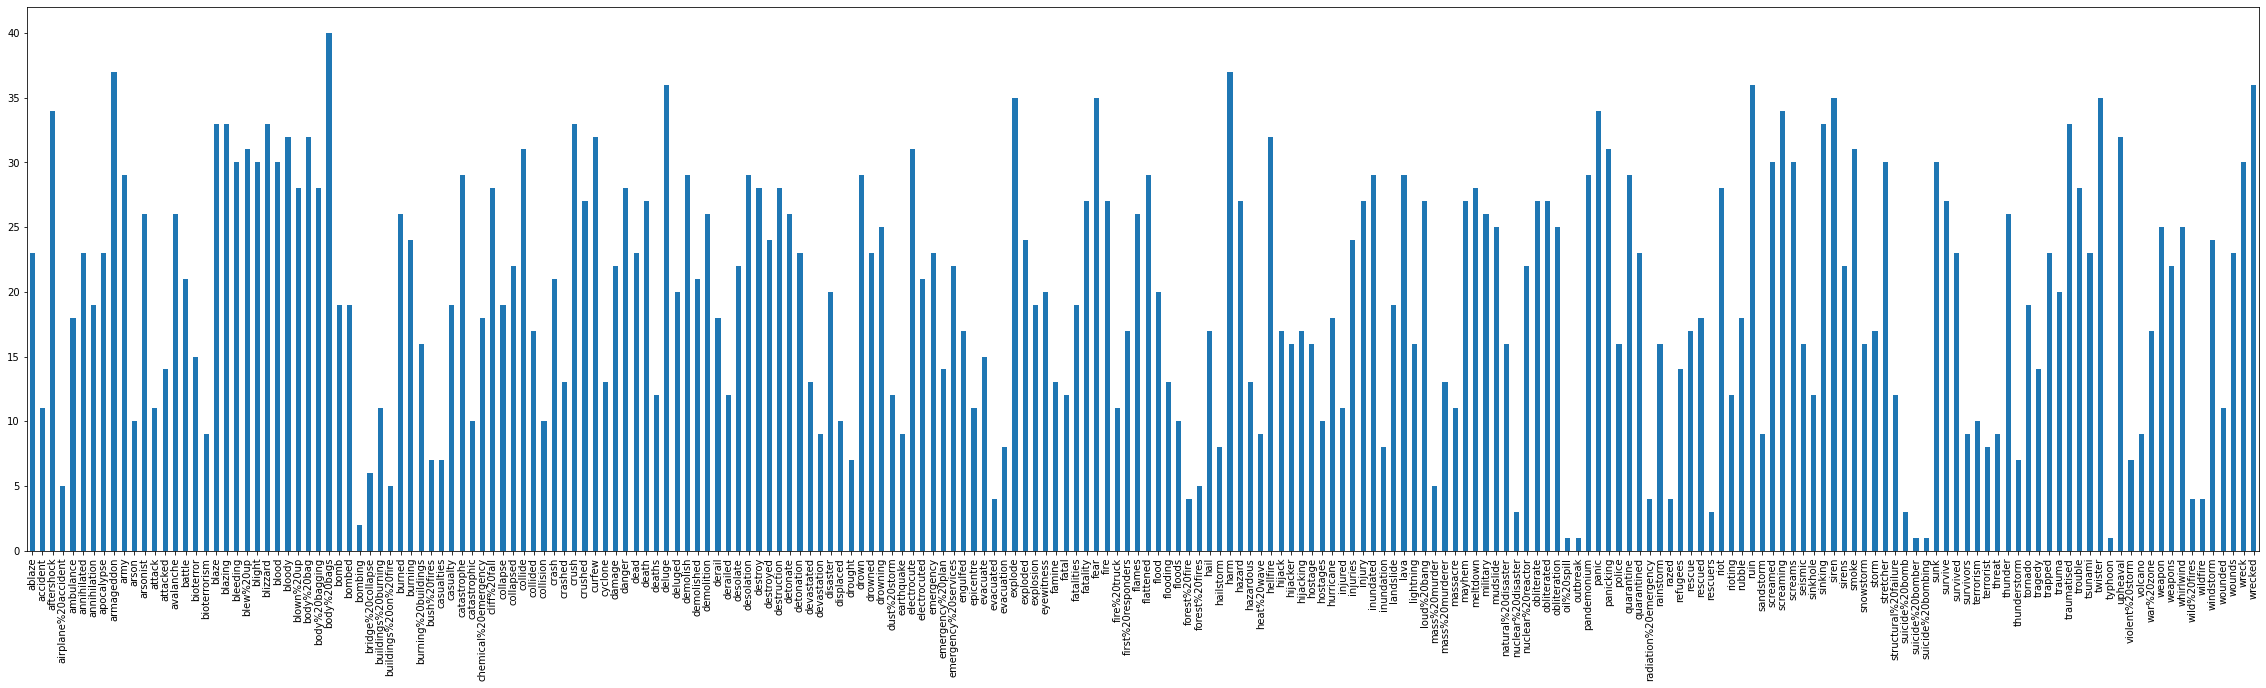

In [24]:
false['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))

Text(0.5, 1.0, 'len vs target')

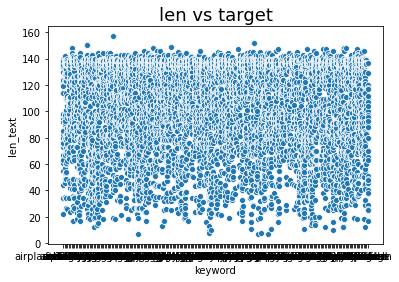

In [25]:
g = sb.scatterplot(x = "keyword", y = "len_text", data = train)
g.set_title("len vs target", fontsize=18)

In [26]:
top_location = train[train['location'] == 'USA']
top_location['target'].value_counts()

1    67
0    37
Name: target, dtype: int64

In [27]:
top_location['keyword'].value_counts()

sandstorm            17
destroyed             7
flood                 3
suicide%20bombing     3
wounded               3
                     ..
hail                  1
landslide             1
hurricane             1
deluge                1
hijacker              1
Name: keyword, Length: 65, dtype: int64

Text(0, 0.5, 'Cantidad')

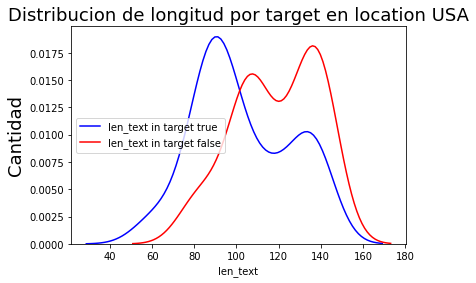

In [28]:
g1 = sb.distplot(top_location[top_location['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_location[top_location['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en location USA", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

Text(0, 0.5, 'Cantidad')

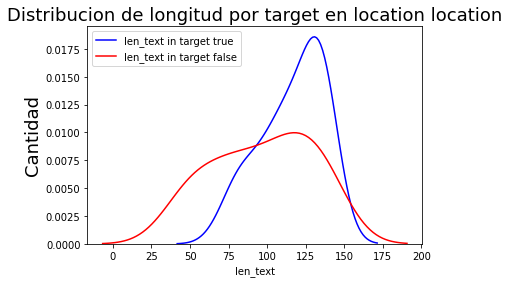

In [29]:
top_keyword = train[train['keyword'] == 'fatalities']
g1 = sb.distplot(top_keyword[top_keyword['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_keyword[top_keyword['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en location location", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

In [30]:
true['location'].value_counts()

USA                    67
United States          27
Nigeria                22
India                  20
Mumbai                 19
                       ..
Saline, MI              1
Ktx                     1
LEALMAN, FLORIDA        1
Mogadishu, Somalia      1
Rockland County, NY     1
Name: location, Length: 1513, dtype: int64

In [31]:
false['location'].value_counts()

New York                         55
USA                              37
London                           29
United States                    23
Los Angeles, CA                  18
                                 ..
Hamilton, ON                      1
AUS                               1
Riverview, FL                     1
chillin at ceder rapids           1
Sherwood, Brisbane, Australia     1
Name: location, Length: 2142, dtype: int64

In [ ]:
train.loc[train['location'] == 'M!$$!$$!PP!', 'location'] = 'Mississippi'

(array([   0,    1,    2, ..., 3338, 3339, 3340]),
 <a list of 3341 Text major ticklabel objects>)

/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ben/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 144 missing from curre

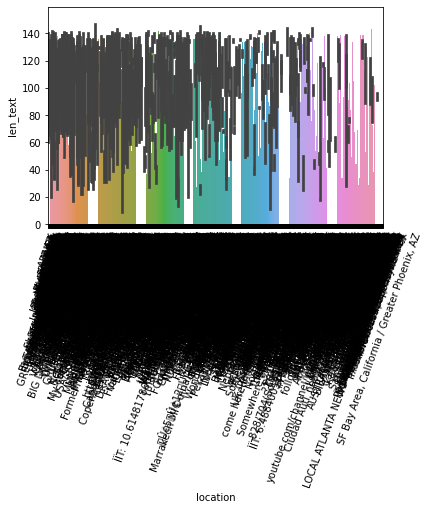

In [128]:
plt.rcParams['font.family'] = ['arial unicode']

real_locations = train.dropna(subset=['location'])

g = sb.barplot(x = "location", y = "len_text", data = real_locations)
plt.xticks(rotation= 70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

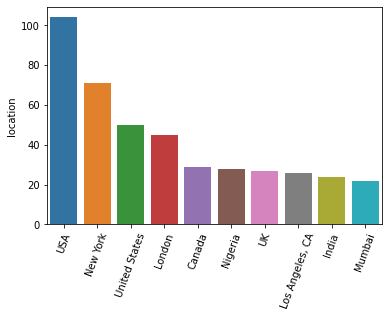

In [129]:
top_10_locations = real_locations['location'].value_counts().nlargest(10)

sb.barplot(x=top_10_locations.index, y=top_10_locations)
plt.xticks(rotation=70)